## Esercizio A
- A.1. Quanti sono i cani seguiti dall’ambulatorio?  
- A.2. Quanti cani soffrono di ipertensione?  

In [1]:
data = read.csv("cani.csv",sep=";",dec=",")
data[1:5,]
cat("A.1.: ", nrow(data), "\n")
cat("A.2.: ", nrow(data[data$IP=="SI",]), "\n")

,Cartella,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,S0601,NO,0,10.35,0,NA,0,2,NO,5.25,0,2.50,1.15,0.97,70,37,78.69,23.75,1.58,0.99
2,C0621,NO,0,15.21,1,1,341,3,NO,6.00,0,1.61,1.50,1.47,83,51,130.58,23.88,1.94,0.99
3,B0918,NO,0,15.77,1,1,117,3,NO,3.20,0,2.50,1.87,2.08,91,62,180.35,16.22,2.21,0.84
4,R1009,NO,0,13.54,1,1,93,4,SI,26.50,0,3.07,2.28,2.85,75,44,234.17,40.15,2.09,1.16
5,R1513,NO,0,10.72,0,NA,666,3,NO,11.00,0,2.54,0.75,0.86,69,38,139.84,43.89,1.98,1.23


A.1.:  161 
A.2.:  58 


3. Consideriamo ora l’età dei pazienti.
    - 3.1. Tracciare un istogramma dell’età dei cani con i seguenti accorgimenti:
        - fissando a un anno l’ampiezza delle classi e
        - considerando gli intervalli chiusi a sinistra e aperti a destra.

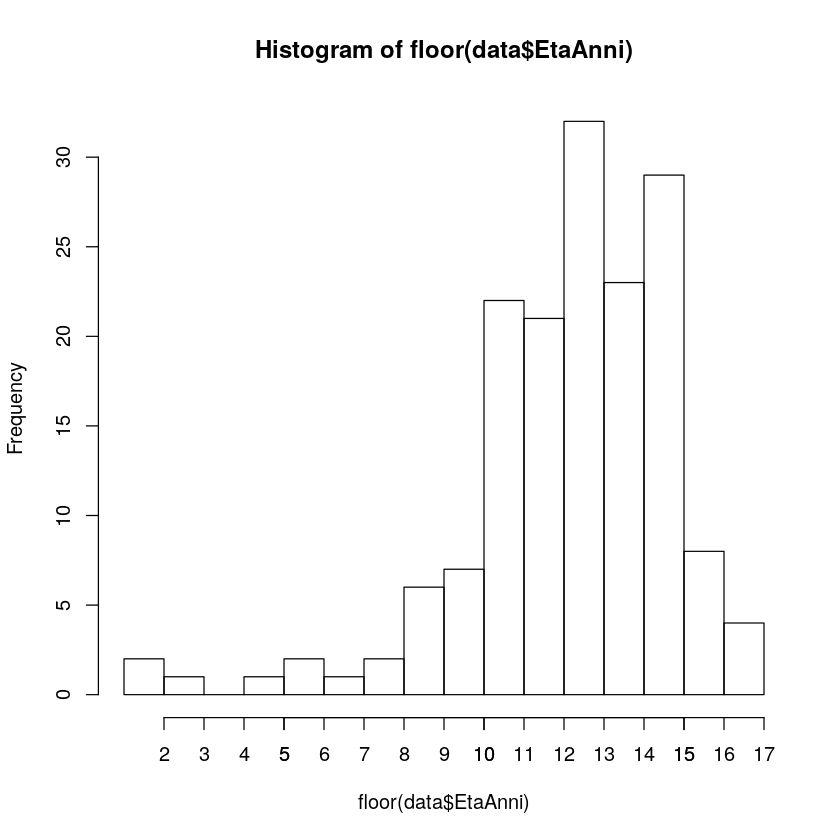

In [6]:
age_min <- min(floor(data$EtaAnni))
age_max <- max(floor(data$EtaAnni))
hist(floor(data$EtaAnni), breaks=seq(age_min,age_max+1,1), right=FALSE)
axis(1, age_min:age_max+1)

l'istogramma del'età presenta una forte assimetria a destra.  
Questo significa che l'ambulatorio registra più frequentemente cani di età elevata,  
il che è estremamente ragionevole dato che questi sono sicuramente più soggetti a malattie.  

A.3.2. Descrivere l’età dei pazienti compilando la Tabella 1, in cui scegliere un opportuno indice di centralità e un opportuno indice di dispersione

In [3]:
cat(rep("\u0305",18),"\n")
cat("| min    |", min(data$EtaAnni), ' |\n')
cat(rep("\u0305",18),"\n")
cat("| median |", median(data$EtaAnni), '|\n')
cat(rep("\u0305",18),"\n")
cat("| IQR    |", IQR(data$EtaAnni), ' |\n')
cat(rep("\u0305",18),"\n")
cat("| max    |", max(data$EtaAnni), '|\n')
cat(rep("\u0305",18),"\n")

̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ 
| min    | 1.22  |
̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ 
| median | 12.55 |
̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ 
| IQR    | 3.17  |
̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ 
| max    | 16.84 |
̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ ̅ 


A.3.3. Quanti sono i pazienti di età compresa nell’intervallo tra i 12 e i 13 anni, estremo inferiore incluso ed estremo superiore escluso ?  
A.3.4. Quanti anni ha il cane più anziano?  
A.3.5. Qual è la fascia di età maggiormente rappresentata? Si risponda con un intervallo chiuso a sinistra e aperto a destra.

In [4]:
cat("A.3.3:",nrow(data[data$EtaAnni < 13 & data$EtaAnni >= 12,]),"\n")
cat("A.3.4:",max(data$EtaAnni),"\n")
cat("A.3.5:","[12,13)")

A.3.3: 32 
A.3.4: 16.84 
A.3.5: [12,13)

A.4. Consideriamo le variabili MORTE e MC.  
A.4.1. Quanti cani sono deceduti?

In [5]:
nrow(data[data$MORTE == 1, ])

[1] 43

A.4.2. Nell’inserire le informazioni riguardo a un cane deceduto, l’operatore ha sempre specificato se la morte è avvenuta per cause cardiache o per altre cause?   
Se la risposta è "no", in quanti casi (sempre relativamente ai cani deceduti) l’operatore ha omesso tale informazione?  
l'operatore non ha sempre specificato l'argomento di MC, infatti, per alcune righe MC è lasciato come ``NA``.

A.4.3. Controllare che non ci siano nei dati incongruenze riguardo alla morte, ovvero che non ci siano casi per i quali il cane risulta vivo ma morto di morte cardiaca.

In [6]:
nrow(data[!is.na(data$MC) & data$MC == 1 & data$MORTE == 0,])

[1] 0

non ci sono incongruenze.  

4.4. Quanti cani sono deceduti per cause cardiache?

In [7]:
nrow(data[!is.na(data$MC) & data$MC == 1,])

[1] 87

A.4.5. Tra le morti avvenute, quale percentuale è stata per cause cardiache?

In [8]:
casi_favorevoli <- nrow(data[(!is.na(data$MC)) & data$MC == 1, ])
casi_totali     <- nrow(data[data$MORTE == 1, ])
cat(casi_favorevoli*100/casi_totali,"%",sep="")

73.72881%

A.5. La variabile GravitaIP è un indice di gravità dell’ipertensione.  
A.5.1. Si tratta di un carattere scalare, ordinale oppure nominale?  
A.5.2. Quali valori può assumere?

In [9]:
unique(data$GravitaIP)

[1] 0 1 2 3

A.5.1: è ordinale in quanto rappresenta un ordinamento sulla gravità.  
A.5.2: può assumere valori 0,1,2,3

A.5.3. Produrre la tabella delle frequenze relative diGravitaIP.

In [10]:
prop.table(table(data$GravitaIP))


         0          1          2          3 
0.63975155 0.18012422 0.11180124 0.06832298 

A.5.4. Tracciare un grafico opportuno per descrivere la gravità dell’ipertensione.

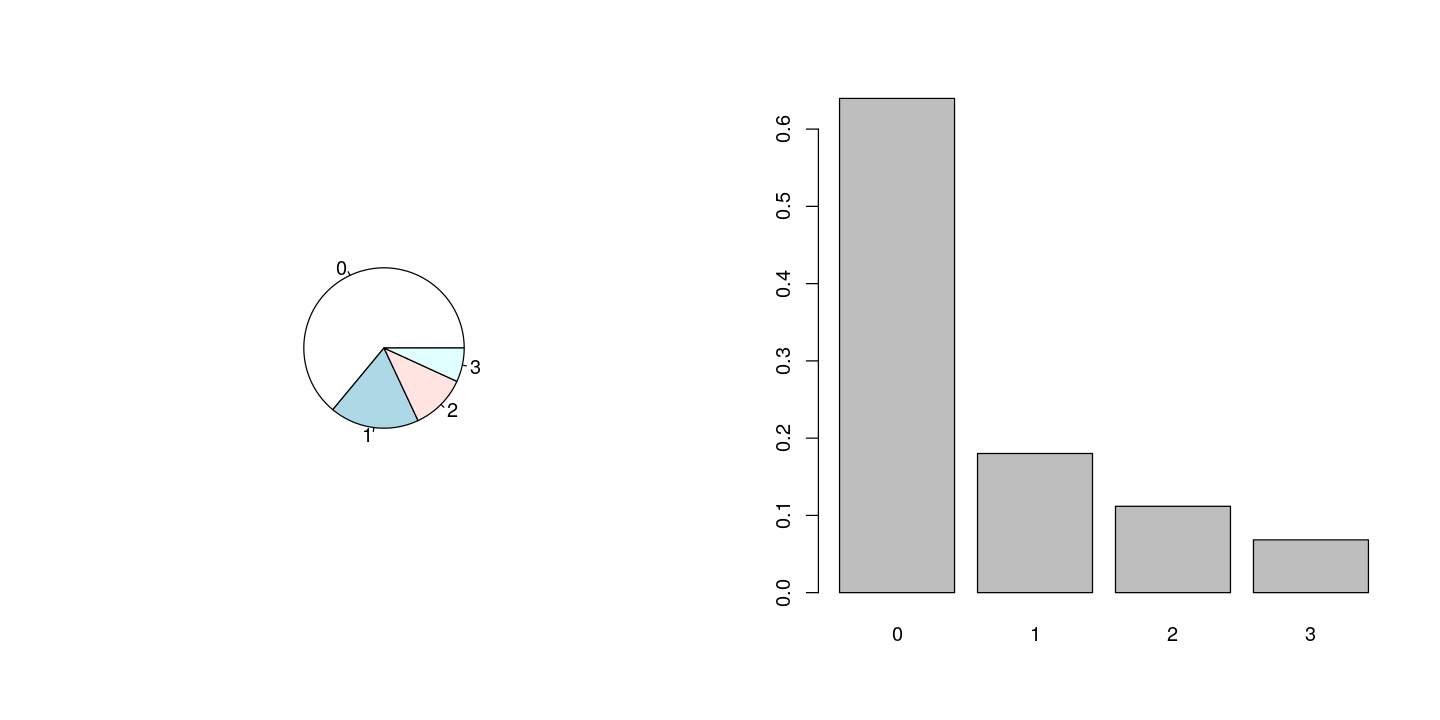

In [11]:
library(repr)
layout(matrix(1:2,1,2))
options(repr.plot.width = 12, repr.plot.height = 6)
pie(prop.table(table(data$GravitaIP)))
barplot(prop.table(table(data$GravitaIP)))

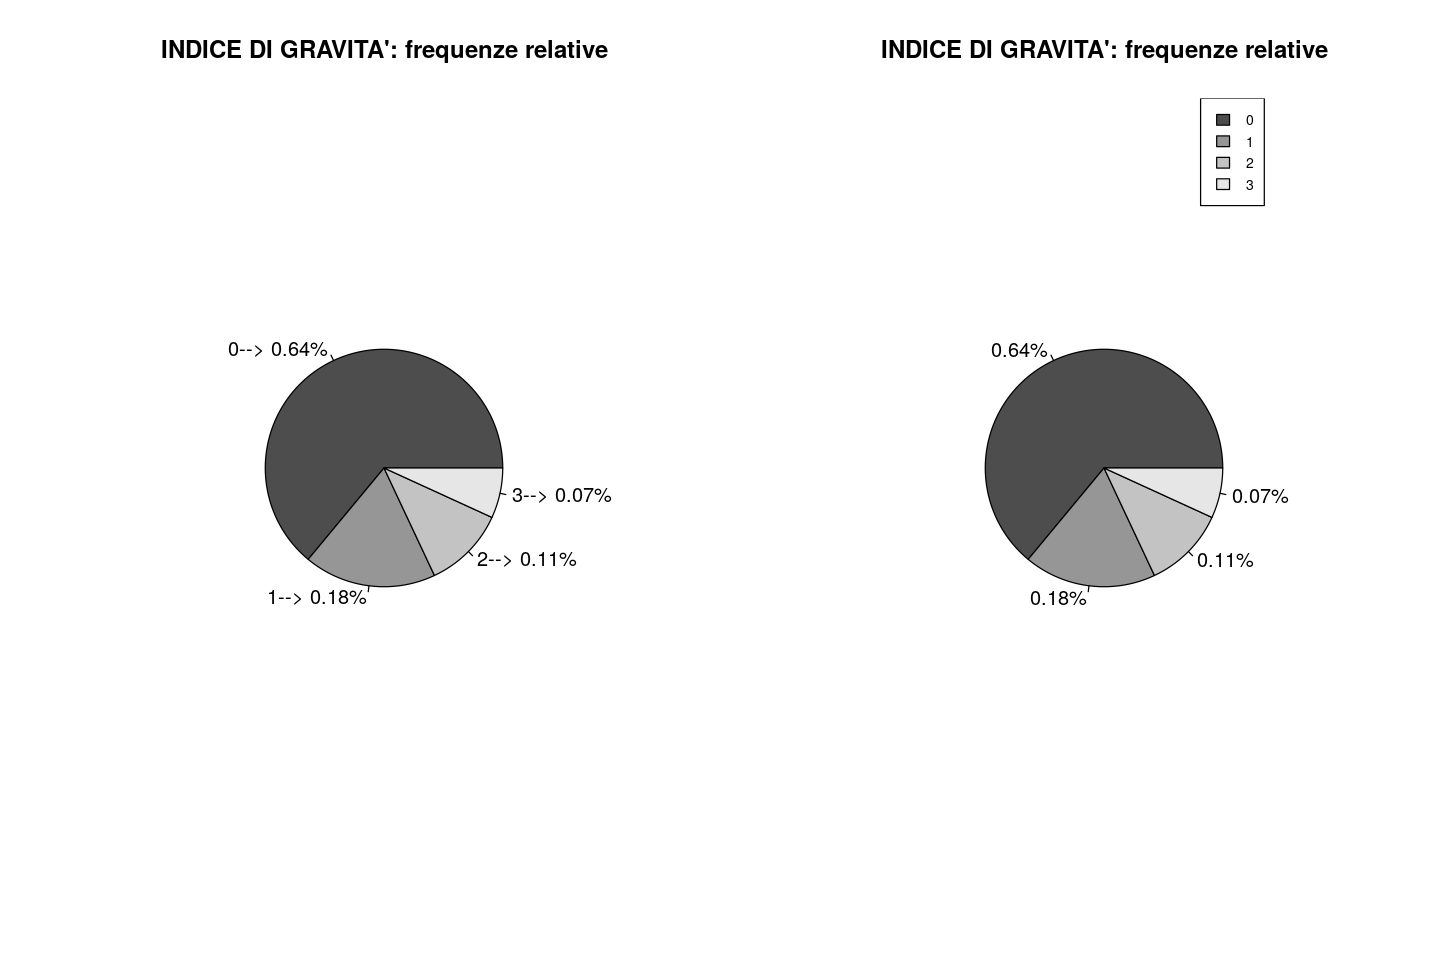

In [12]:
### alternative ###

layout(matrix(1:2,1,2))
options(repr.plot.width = 12, repr.plot.height = 8)

percentuali <- round(prop.table(table(data$GravitaIP)),2)
valori<-names(percentuali)
etichette <- paste(paste(valori, percentuali,sep="--> "),"%",sep="") 
colori<-grey.colors(length(etichette))
pie(table(data$GravitaIP),labels = etichette, col= colori,main="INDICE DI GRAVITA': frequenze relative")

percentuali <- round(prop.table(table(data$GravitaIP)),2)
valori<-names(percentuali)
etichette <- paste(percentuali,"%",sep="") 
colori<-grey.colors(length(etichette))
pie(table(data$GravitaIP),labels = etichette, main="INDICE DI GRAVITA': frequenze relative",col=grey.colors(length(etichette)))
legend("topright", valori, cex=0.7,fill=colori)

Essendo solamente 4 i possibili valori di ``GravitàIP``,
I grafici più adeguati sono quello a torta e quello a barre.

A.6. Consideriamo l’assunzione di farmaci antiaritmici e la morte per cause cardiache.  
A.6.1. Produrre la tabella delle frequenze assolute del carattere Antiaritmico.  
A.6.2. Quanti sono i cani che assumono un farmaco antiaritmico?

In [13]:
print("A.6.1:")
print(table(data$Antiaritmico))
print("A.6.2:")
print(nrow(data[data$Antiaritmico == "SI", ]))

[1] "A.6.1:"

 NO  SI 
150  11 
[1] "A.6.2:"
[1] 11


A.6.3. Il carattereAntiaritmico è categorico. Volendolo convertire in un carattere numerico, con quale valore numerico mettereste in corrispondenza valore "SI"? Con quale il"NO"?  
rispettivamente 1 e 0 sembra una buona scelta. 

A.6.4. Produrre la tabella delle frequenze assolute congiunte dei caratteri Antiaritmico e MC.

In [14]:
frequenze_congiunte<-table(data$Antiaritmico, data$MC); 
frequenze_congiunte

    
      0  1
  NO 28 78
  SI  0  9

A.6.5. Quale percentuale dei cani morti per cause cardiache assumeva un farmaco antiaritmico?

In [15]:
casi_totali     <- sum(frequenze_congiunte[,"1"])
casi_favorevoli <- frequenze_congiunte["SI","1"]

cat(casi_favorevoli*100/casi_totali,"%")

10.34483 %

A.7. Il carattere SURVIVALTIME (tempo di sopravvivenza) ci dice per quanti giorni il paziente è rimasto in vita a partire dalla prima visita presso l’ambulatorio. Come mostratonei grafici di Figura 1, la distribuzione delle frequenze del tempo di sopravvivenza ha un aspetto molto diverso se si considera rispetto ai cani ancora in vita oppure a quelli morti. Potete rispondere alle seguenti due domande semplicemente ispezionando i graficidi Figura 1, considerando un anno costituito da 365 giorni.

A.7.1. Quale percentuale di cani tuttora vivi è in cura presso l’ambulatorio da meno di unanno?

In [16]:
ecdf(data[data$MORTE==0,]$SURVIVALTIME)(365)*100

[1] 65.11628

A.7.2. Quale percentuale di cani deceduti è sopravvissuta più di 3 anni?

In [17]:
morti <- data[data$MORTE==1,]
s <- ecdf(morti$SURVIVALTIME)(365*3) # cani morti sopravvissuti meno di 3 anni
1-s # cani morti sopravvissuti più di 3 anni

[1] 0.1016949

A.7.3. Tracciare un grafico opportuno per descrivere il tempo di sopravvivenza.

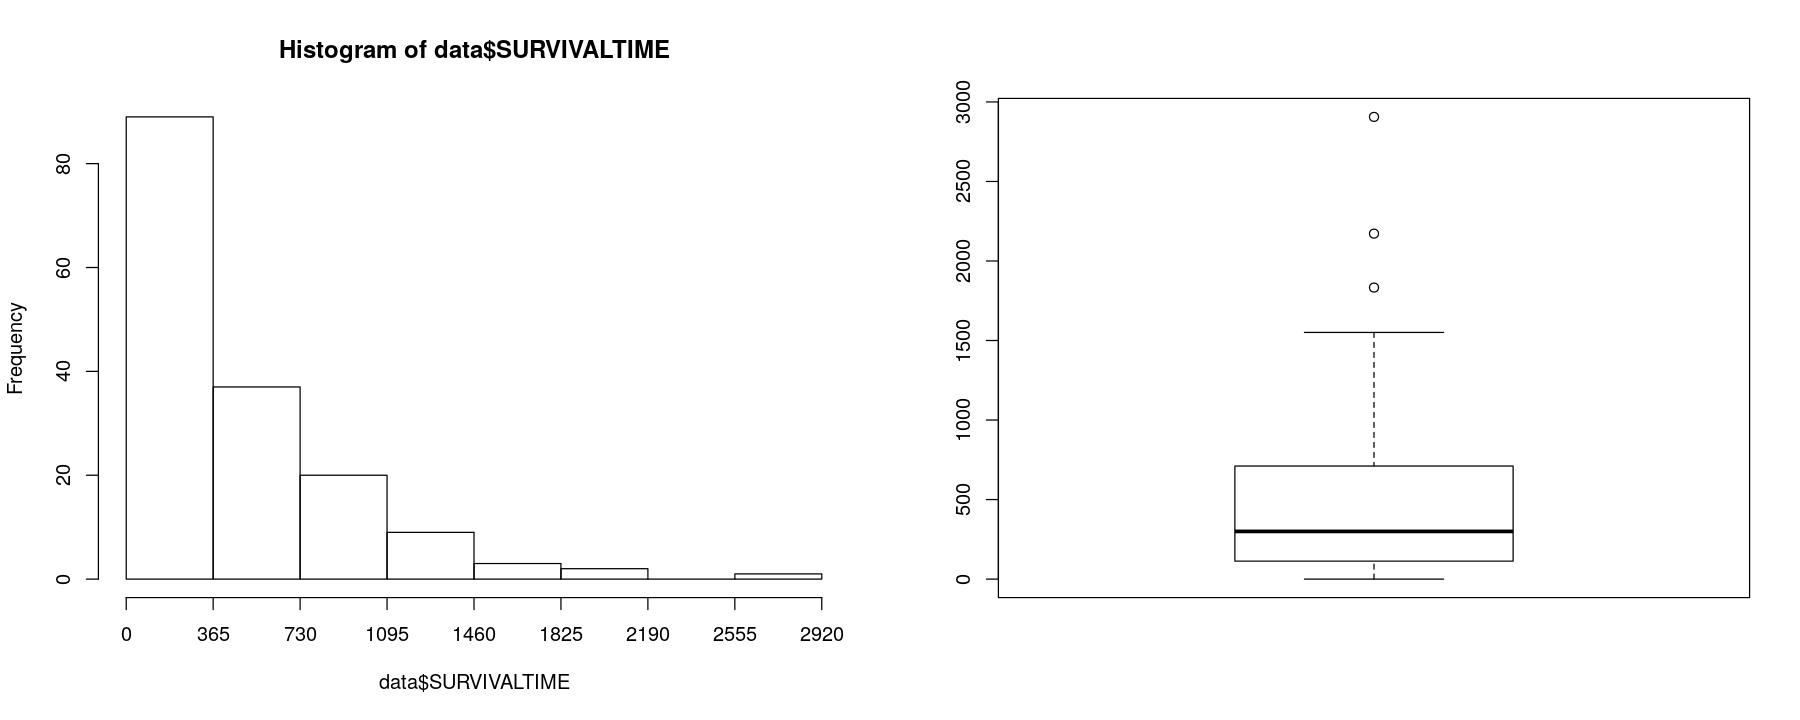

In [18]:
layout(matrix(1:2,1,2))
options(repr.plot.width = 15, repr.plot.height = 6)
hist(data$SURVIVALTIME,breaks=seq(0,3000,by=365),xaxt="n")
axis(side=1, at=seq(0,3000, 365))
boxplot(data$SURVIVALTIME)


7.4. La Figura 2(a) mostra il boxplot del tempo di sopravvivenza dei cani del dataset. Completare il grafico con il valore numerico degli estremi dellascatola.

In [19]:
info <- boxplot(data$SURVIVALTIME, plot=FALSE);
info$stats[2]
info$stats[4]
quantile(data$SURVIVALTIME,0.25)[["25%"]]
quantile(data$SURVIVALTIME,0.75)[["75%"]]

[1] 113

[1] 711

[1] 113

[1] 711

A.7.5. Quanti animali sono compresi all’interno dellascatola(estremi inclusi)?

In [20]:
nrow(data[!is.na(data$SURVIVALTIME) & data$SURVIVALTIME<=711.0  & data$SURVIVALTIME>=113.0,])

[1] 81

In [21]:
nrow(data[!is.na(data$SURVIVALTIME) & data$SURVIVALTIME <= 711 & data$SURVIVALTIME >= 113,])

[1] 81

A.7.6. Tracciare un grafico opportuno, diverso dal boxplot, che descriva bene il tempo disopravvivenza dei cani considerati.

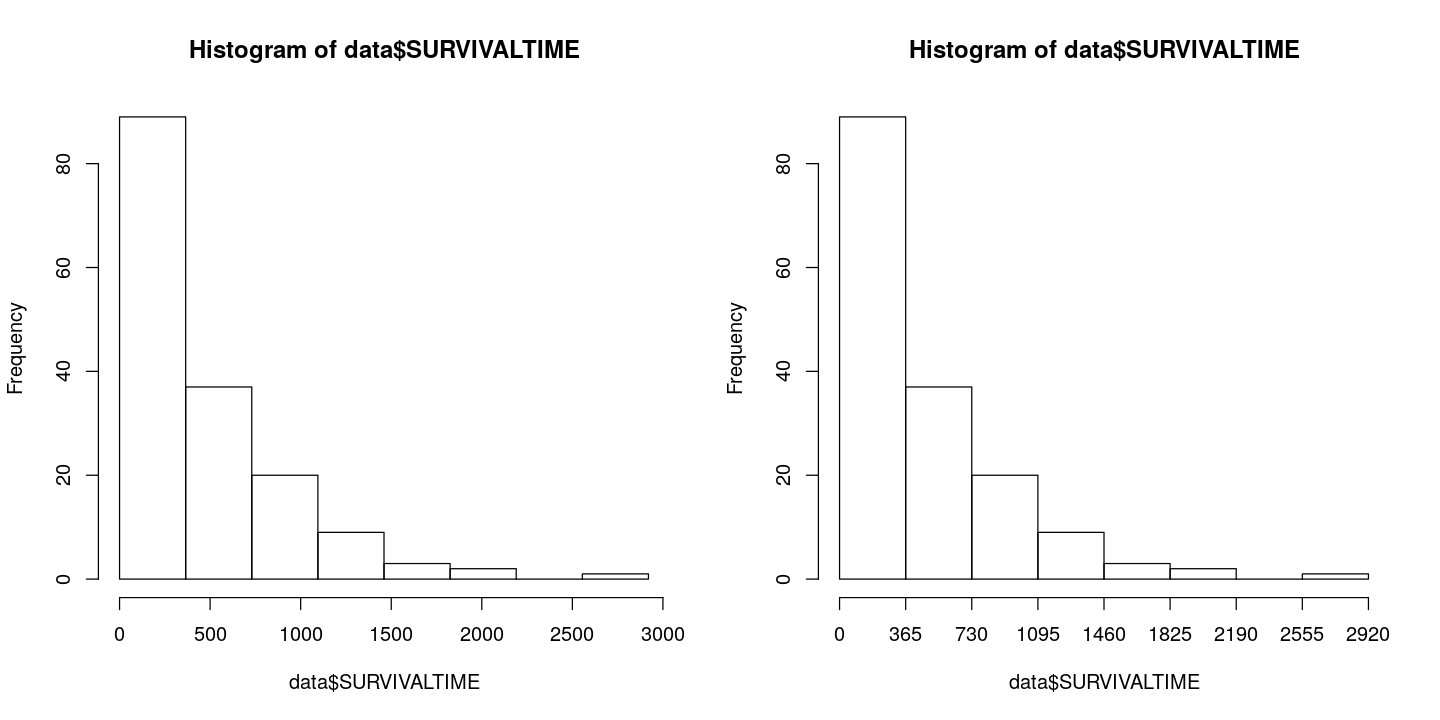

In [22]:
layout(matrix(1:2,1,2))
options(repr.plot.width = 12, repr.plot.height = 6)
hist(data$SURVIVALTIME,breaks=seq(0,3000,by=c(365)))

# più leggibile
hist(data$SURVIVALTIME,breaks=seq(0,3000,by=c(365)),xaxt="n")  
axis(side=1, at=seq(0,3000, 365))

A.7.7. Suggerite un modello teorico a voi noto che possa spiegare l’andamento aleatorio della variabile casuale X="Tempo di sopravvivenza dei cani che frequentano (ofrequenteranno) l’ambulatorio". Giustificate la risposta.  
è decrescente, potrebbe essere una geometrica o una esponenziale

A.7.8. Calcolate il tempo di sopravvivenza medio.

In [23]:
mean(data$SURVIVALTIME,na.rm=TRUE)

[1] 459.8882

A.7.9. Calcolate la deviazione standard del tempo di sopravvivenza.

In [24]:
sd(data$SURVIVALTIME,na.rm=TRUE)

[1] 467.1967

A.8. Consideriamo il carattere Allodiast.  
A.8.1. Controllare se esso può essere considerato normale.

[1] 2.013354

[1] 2

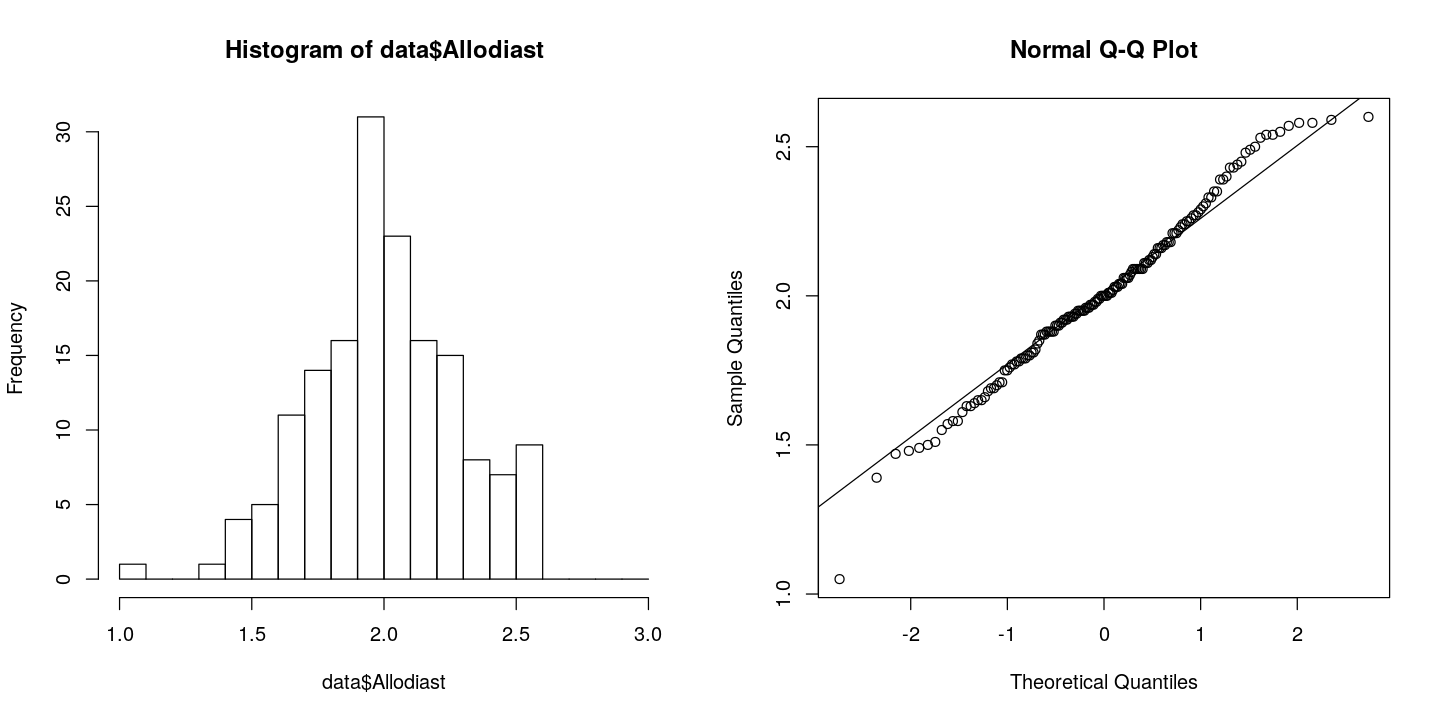

In [25]:
layout(matrix(1:2,1,2))
options(repr.plot.width = 12, repr.plot.height = 6)

hist(data$Allodiast,breaks=seq(1,3,0.1)) 

mean(data$Allodiast)
median(data$Allodiast)

qqnorm(data$Allodiast)
qqline(data$Allodiast)

media e mediana sono simili -> favore alla normalità.  
dall'istogramma si vede una certa simmetria.  
dal qqplot c'è una buona aderenza alla normalità meno nelle code.  

A.8.2. Controllare che nell’intervallo di semi ampiezza 2 deviazioni standard e centrato sulla media risiede circa il 96% delle osservazioni per tale carattere.

In [69]:
media <- mean(data$Allodiast,na.rm=T)
devst <- sd(data$Allodiast,na.rm=T)
a <- 2
ecdf_Allodiast <- ecdf(data$Allodiast)

ecdf_Allodiast(media + a * devst)-ecdf_Allodiast(media - a * devst)

[1] 0.9627329

Per conclude ``Allodiast`` non è normale, ma si comporta come tale vicino alla media (cioè fino a due deviazioni standard dalla media).

A.9. I caratteri EDVI e Allodiast sono indipendenti? Motivare la risposta, anche con l’ausilio di un grafico.

[1] 0.907304

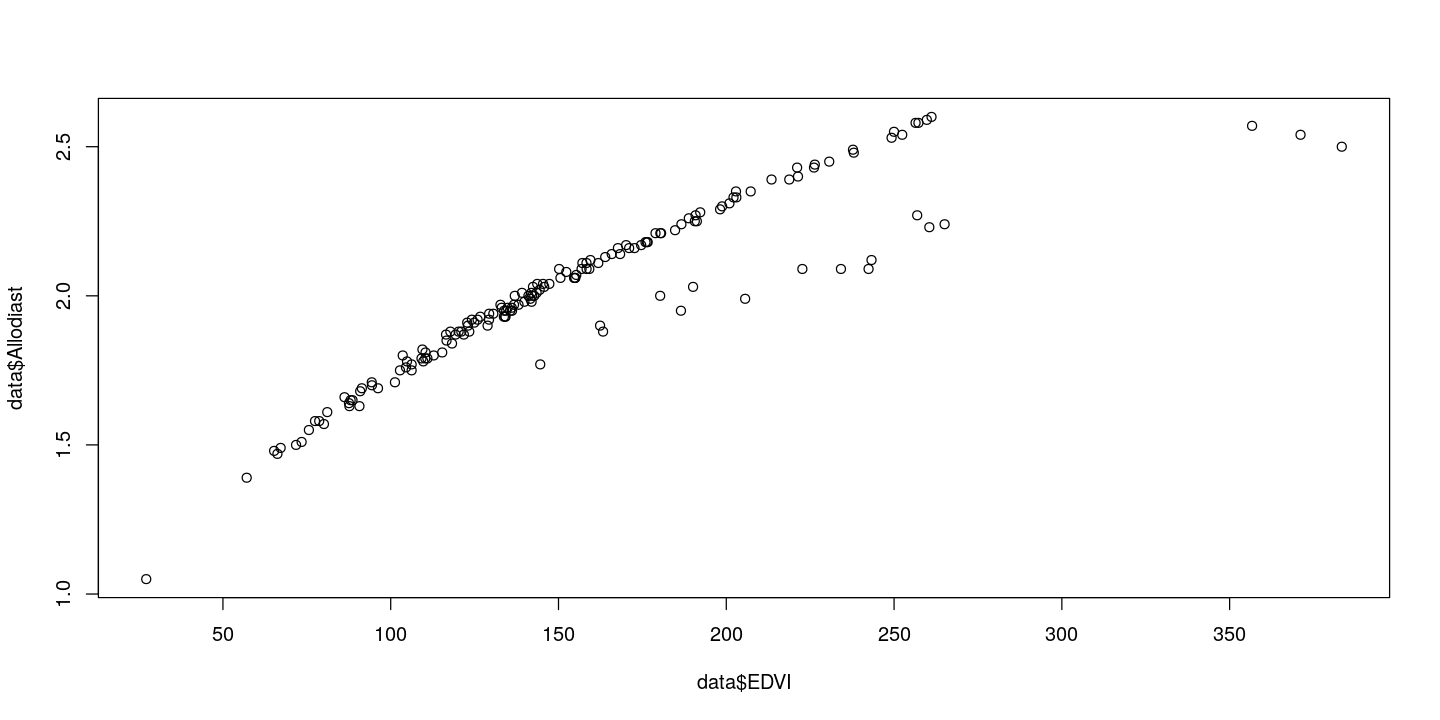

In [27]:
plot(data$EDVI, data$Allodiast)
cor(data$EDVI, data$Allodiast)

c'è infetti una relazione lineare tra ``EDVI`` e ``Allodiast``  .  
Infatti, all'aumentare di uno aumenta anche l'altro.

## Esercizio B

Create una variabile che contenga la parte di dataset relativa ai cani morti e considerando soltanto i casi in cui sia il carattere MC, sia il carattere OndaEA non siano mancanti. Nel presente esercizio le domande si riferiranno esclusivamente a questo sottoinsieme di casi.

In [28]:
dataB<-data[data$MORTE==1&!is.na(data$MC)&!is.na(data$OndaEA),]

B.1. L’OndaEA è un carattere scalare oppure ordinale?  
E' un carattere scalare


B.2. Produrre il boxplot relativo al carattere OndaEA

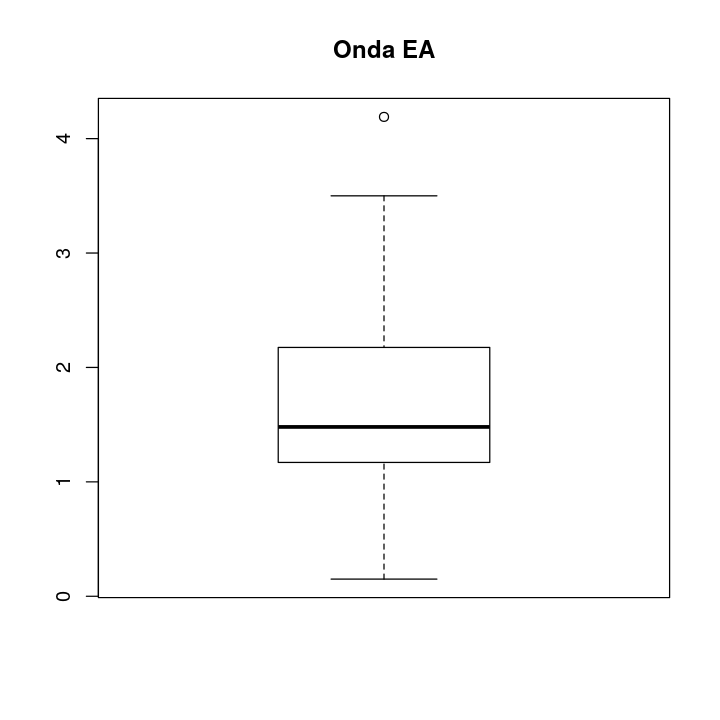

In [29]:
options(repr.plot.width = 6, repr.plot.height = 6)
boxplot(dataB$OndaEA, main= "Onda EA")

B.3. Il grafico ottenuto dovrebbe mostrare la presenza di un outlier. Determinare il valore diOndaEAper tale individuo.

In [70]:
max(dataB$OndaEA)

[1] 4.19

B.4. L’outlier individuato è un cane morto per cause cardiache oppure no?

In [31]:
dataB[dataB$OndaEA == max(dataB$OndaEA),]$MC

[1] 1

B.5. Si controlli che il terzo quartile, chiamiamolo s, dell’OndaEA relativamente ai cani deceduti per cause non cardiache è 1.41.

In [77]:
s <- quantile(dataB[dataB$MC==0,"OndaEA"],0.75,na.rm=TRUE)[["75%"]]
s

[1] 1.41

B.6. Quanti sono i cani deceduti per cause cardiache? Quanti per altre cause?

In [33]:
nrow(dataB[dataB$MC==1,])
nrow(dataB[dataB$MC==0,])

[1] 66

[1] 17

B.7. All’interno del dataset che stiamo considerando, quanti cani deceduti per cause cardiache avevano il valore di OndaEA ≥ s? E quanti cani deceduti per cause non cardiache avevano il valore di OndaEA < s?

In [34]:
nrow(dataB[dataB$MC==1 & dataB$OndaEA >= s,])
nrow(dataB[dataB$MC==0 & dataB$OndaEA < s,])

[1] 41

[1] 12

B.8. Utilizziamo il valore s trovato al punto 5. come soglia per un classificatore binario che discrimina tra morte cardiaca e morte non cardiaca: il classificatore classificherà come morte cardiaca i casi per i quali OndaEA ≥ s e come morte non cardiaca i casi per i quali OndaEA < s. Calcolare la sensibilità e la specificità di questo classificatore.

In [35]:
TP <- nrow(dataB[dataB$MC==1 & dataB$OndaEA >= s,]) # quei valori che sono classificati T ed sono realmente T
FP <- nrow(dataB[dataB$MC==0 & dataB$OndaEA >= s,]) # quei valori che sono classificati T ed sono realmente F
TN <- nrow(dataB[dataB$MC==0 & dataB$OndaEA < s,])  # quei valori che sono classificati F ed sono realmente F
FN <- nrow(dataB[dataB$MC==1 & dataB$OndaEA < s,])  # quei valori che sono classificati F ed sono realmente T
sensibilita <- TP / ( TP + FN ) # il rapporto le predizioni corrette e le predizioni totali (considenrando però solamente i realemente T)
specificita <- TN / ( FP + TN ) # il rapporto le predizioni corrette e le predizioni totali (considenrando però solamente i realemente F)
sensibilita   # True positive rate TPR
specificita   # True negative rate TNR
1-specificita # False positive rate FPR

[1] 0.6212121

[1] 0.7058824

[1] 0.2941176

B.9. Tracciare il grafico della curva ROC per il classificatore individuato nei punti precedenti, basato sul carattere OndaEA.

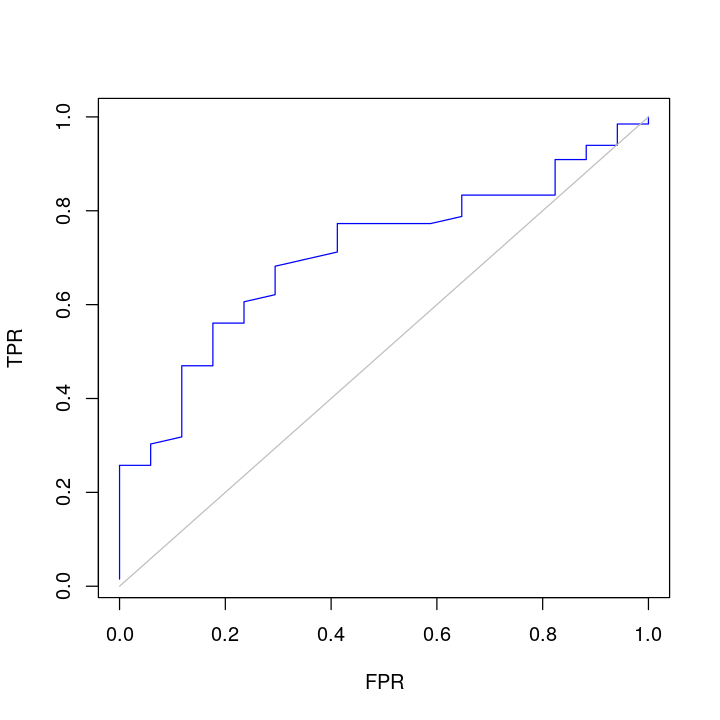

In [83]:
soglie <- unique(sort(data$OndaEA))
sensibilita <- c()
specificita <- c()
for (s in soglie) {
    TP <- nrow(dataB[!is.na(dataB$MC) & !is.na(dataB$OndaEA) & dataB$MC==1 & dataB$OndaEA >= s,])
    FP <- nrow(dataB[!is.na(dataB$MC) & !is.na(dataB$OndaEA) & dataB$MC==0 & dataB$OndaEA >= s,])
    TN <- nrow(dataB[!is.na(dataB$MC) & !is.na(dataB$OndaEA) & dataB$MC==0 & dataB$OndaEA < s,])
    FN <- nrow(dataB[!is.na(dataB$MC) & !is.na(dataB$OndaEA) & dataB$MC==1 & dataB$OndaEA < s,])
    sensibilita <- c(sensibilita, TP / ( TP + FN ))
    specificita <- c(specificita, TN / ( FP + TN ))
}
plot(1-specificita,sensibilita,type = "l",xlab = "FPR",ylab = "TPR", col="blue")
lines(c(0,1),c(0,1),type="l",col="grey")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



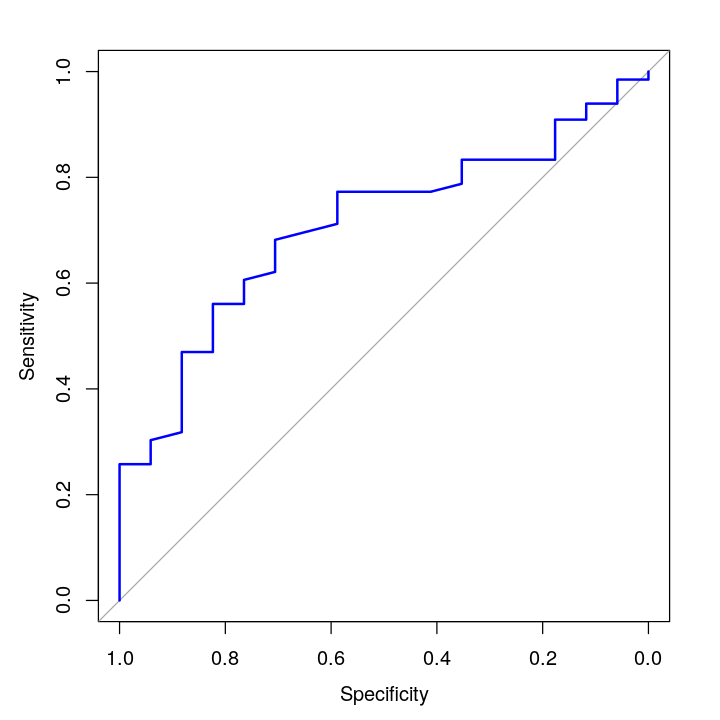

In [82]:
library(pROC)
plot.roc(dataB$MC, dataB$OndaEA, col="blue")